# Тематическое моделирование

В предыдущих сериях:

1) Сделали обычный процессинг - столбец `cleaned_text`
2) Сделали лемматизацию - `lemmatized_text`
3) По lemmatized_text сделали селекцию от 6 слов и больше


In [1]:
# 1
import pandas as pd

import yaml
import pathlib
ROOT = pathlib.Path().resolve().parent.parent

with open(ROOT / "config.yml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

DATA_PATH = ROOT / config['api']['DATA_PATH']

In [2]:
# 2

cm_df = pd.read_csv(DATA_PATH / 'comment' / 'comments_text.csv', sep='\t')

cm_df


,id,snippet.videoId,snippet.textDisplay,snippet.textOriginal,snippet.authorDisplayName,snippet.parentId,cleaned_text,lemmatized_text
0,UgyKlKuQTfZlkw5sqeN4AaABAg,AAjsSrjZXsw,"Люди тупые, они не понимают, что оригинал стои...","Люди тупые, они не понимают, что оригинал стои...",Елена Марьина,-1,"Люди тупые, они не понимают, что оригинал стои...",человек тупой понимать оригинал стоять офигенн...
1,UgxQi90tx9SVF0IauDN4AaABAg,AAjsSrjZXsw,Не понимаю маниакального желания покупать коре...,Не понимаю маниакального желания покупать коре...,Glapfira Nikolaevna,-1,Не понимаю маниакального желания покупать коре...,понимать маниакальный желание покупать корейск...
2,UgwYIO4Dwr8lwOl5_jl4AaABAg,AAjsSrjZXsw,Пару лет назад на Озон купила духи D&G The One...,Пару лет назад на Озон купила духи D&G The One...,Гурия Мирзаева,-1,Пару лет назад на Озон купила духи D&G The One...,пара год назад озон купить дух d g the one жен...
3,UgxvyL4Z2XXYCvnraL54AaABAg,AAjsSrjZXsw,"Я дико извиняюсь, но слово контрофакт, если я ...","Я дико извиняюсь, но слово контрофакт, если я ...",thefallensun_,-1,"Я дико извиняюсь, но слово контрофакт, если я ...",дико извиняться слово контрофакт ошибаться выл...
4,Ugwwha8cCeWK74_460h4AaABAg,AAjsSrjZXsw,Вайлдбериз вообще никого и ничего не уважает и...,Вайлдбериз вообще никого и ничего не уважает и...,Наталья Пирогова,-1,Вайлдбериз вообще никого и ничего не уважает и...,вайлдбериз вообще никто ничто уважать далеко э...
...,...,...,...,...,...,...,...,...
41806,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kODjmNACUy,boB2LEXG_zA,Марципану можно придать любую форму-...батончи...,Марципану можно придать любую форму-...батончи...,Nadeschda Schmunk,Ugwz6GshlUZMMumE9n54AaABAg,Марципану можно придать любую форму-...батончи...,марципан придавать любой форма батончик шарик ...
41807,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kOAgUwU2Jj,boB2LEXG_zA,@Elena CamilleriУ вас итальянская фамилия...в ...,@Elena CamilleriУ вас итальянская фамилия...в ...,Nadeschda Schmunk,Ugwz6GshlUZMMumE9n54AaABAg,CamilleriУ вас итальянская фамилия...в Италии...,camilleriу итальянский фамилия италия марципан...
41808,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kOABWk8eEa,boB2LEXG_zA,и вообще невкусный... я только батончики марци...,и вообще невкусный... я только батончики марци...,Марина Марина,Ugwz6GshlUZMMumE9n54AaABAg,и вообще невкусный... я только батончики марци...,вообще невкусный батончик марципановый шоколад...
41809,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kO9mW3prUk,boB2LEXG_zA,А у нас это каштаны называют и кулинарные изде...,А у нас это каштаны называют и кулинарные изде...,Elena Camilleri,Ugwz6GshlUZMMumE9n54AaABAg,А у нас это каштаны называют и кулинарные изде...,это каштан называть кулинарный изделие миндаль...


## Оценка токенов

In [3]:
# 3 Токенизация и
from nltk import word_tokenize

all_text = [word_tokenize(line) for line in cm_df.lemmatized_text.values]

from nltk import FreqDist


n_types = []
n_tokens = []
fd = FreqDist()
for line in all_text:
    fd.update(line)
    n_types.append(len(fd))
    n_tokens.append(sum(list(fd.values())))

print('Всего токенов:', fd.N())

for i in fd.most_common(10):
    print(i)

Всего токенов: 671325
('очень', 10588)
('это', 9672)
('косметика', 8843)
('спасибо', 8360)
('кожа', 7743)
('видео', 7236)
('корейский', 6591)
('крем', 5917)
('ваш', 5019)
('весь', 4687)


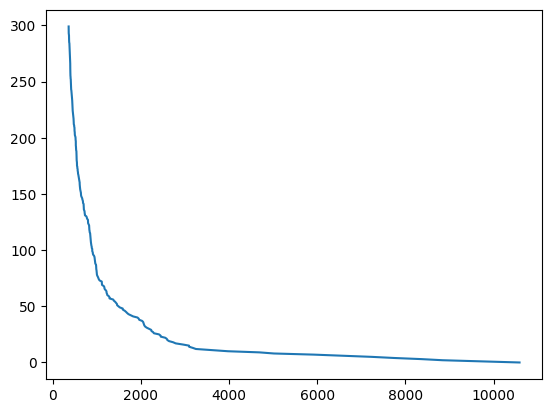

In [4]:
# 4

import matplotlib.pyplot as plt

freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

# Gensim LDA Pipeline

`Coherence Score` (Показатель согласованности) - это показатель того, насколько хорошо темы в модели скрытого распределения Дирихле (LDA) связаны друг с другом. Он рассчитывается путем измерения сходства между словами в каждой теме. Более высокий балл согласованности указывает на то, что темы в большей степени связаны друг с другом, а более низкий балл согласованности указывает на то, что темы в меньшей степени связаны друг с другом.

Существует ряд различных показателей согласованности, которые можно использовать, но наиболее распространенными из них являются:

- **C-value**
Наиболее часто используемый показатель согласованности. Он рассчитывается путем измерения сходства между словами в каждой теме с использованием показателя, называемого поточечной взаимной информацией (PMI).

- **UMass**
Этот показатель согласованности вычисляется путем измерения сходства между словами в каждой теме с использованием показателя, называемого логарифмическим правдоподобием.

- **Sparsity (Разреженность)**
Этот показатель согласованности рассчитывается путем измерения количества слов в каждой теме, которые не используются совместно ни с какой другой темой.

**Показатель согласованности может быть использован для оценки качества модели LDA. Более высокий показатель согласованности указывает на то, что модель выявила более значимые темы. Однако важно отметить, что показатель согласованности не является идеальным показателем качества модели. Модель может иметь высокий показатель согласованности, даже если темы не очень значимы.**

Вот несколько советов по интерпретации показателя согласованности:

1. Показатель согласованности, равный 0,3 или выше, обычно считается хорошим.
2. Показатель согласованности, равный 0,2 или ниже, обычно считается низким.

3. Показатель когерентности может быть использован для сравнения различных моделей LDA.
4. Показатель согласованности может быть использован для выявления тем, которые не очень значимы.

**Важно отметить, что показатель согласованности - это всего лишь один из показателей качества модели. Другие показатели, такие как `Perplexity` (недоумение), также могут быть использованы для оценки качества модели.**

In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import pyLDAvis
import pyLDAvis.gensim
from gensim import corpora
from pprint import pprint


# Create Dictionary
id2word = corpora.Dictionary(all_text)

# Create Corpus
texts = all_text
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [6]:


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=42,
                                           chunksize=100,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.087*"это" + 0.033*"мочь" + 0.032*"весь" + 0.027*"просто" + 0.026*"свой" + '
  '0.024*"человек" + 0.019*"средство" + 0.017*"сказать" + 0.015*"делать" + '
  '0.014*"понимать"'),
 (1,
  '0.101*"день" + 0.055*"канал" + 0.054*"камера" + 0.041*"квартира" + '
  '0.038*"ипотека" + 0.031*"обязательно" + 0.030*"снимать" + 0.022*"скрытый" + '
  '0.019*"вариант" + 0.019*"речь"'),
 (2,
  '0.028*"время" + 0.027*"деньги" + 0.019*"никакой" + 0.018*"работа" + '
  '0.017*"гель" + 0.017*"мало" + 0.017*"пока" + 0.016*"месяц" + 0.015*"врач" + '
  '0.014*"доставка"'),
 (3,
  '0.036*"пожалуйста" + 0.036*"сделать" + 0.022*"случай" + 0.021*"наверное" + '
  '0.019*"витамин" + 0.018*"масло" + 0.015*"также" + 0.014*"пойти" + 0.013*"s" '
  '+ 0.013*"чудо"'),
 (4,
  '0.038*"сыворотка" + 0.037*"использовать" + 0.029*"либо" + '
  '0.023*"попробовать" + 0.022*"эффект" + 0.020*"новый" + 0.019*"миндальный" + '
  '0.019*"пилинг" + 0.019*"увлажнять" + 0.019*"кислота"'),
 (5,
  '0.042*"косметика" + 0.030*"год" + 

In [7]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=all_text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.254613177300971

Coherence Score:  0.4720107404186649


In [8]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.320279 -0.042888       1        1  22.375297
5     -0.301737  0.001450       2        1  20.814183
6     -0.013065  0.262013       3        1  13.500604
7      0.059773 -0.338395       4        1  10.743832
8      0.041208 -0.063412       5        1   7.519842
2      0.041157  0.118591       6        1   7.409657
4      0.116547 -0.026616       7        1   6.169076
3      0.124266  0.036536       8        1   5.301616
9      0.126110  0.016165       9        1   3.930720
1      0.126022  0.036555      10        1   2.235174, topic_info=           Term          Freq         Total Category  logprob  loglift
16         кожа   8825.000000   8825.000000  Default  30.0000  30.0000
90          это  13231.000000  13231.000000  Default  29.0000  29.0000
57        очень   7520.000000   7520.000000  Default  28.0000  28.0000
449        крем   4707.000000   4707.000000  Default  27.0000  27.0000
18    косметика   5869.000000   5869.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
629      угодно    120.184633    121.121701  Topic10  -4.8271   3.7931
625    реальный    105.769026    106.706046  Topic10  -4.9549   3.7920
6283     мокрый    104.787711    105.724843  Topic10  -4.9642   3.7919
8197    ипотека    567.310597    608.606884  Topic10  -3.2753   3.7306
3262    скрытый    331.027049    706.095701  Topic10  -3.8140   3.0433

[376 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
32        8  0.996722         d
3944      8  0.997328         s
35        8  0.995703       the
1598      4  0.997925  аллергия
7864      7  0.997238    ампула
...     ...       ...       ...
90        2  0.014133       это
90        3  0.002570       это
1679      7  0.999506    эффект
122       9  0.995817    яблоко
135       8  0.994800  являться

[414 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 7, 8, 9, 3, 5, 4, 10, 2])

## Оптимизация гиперпараметров в LDA

In [21]:
# Оптимизация гиперпараметров

def calculate_coherence_score(n, alpha, beta):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n,
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)

    perplexity = lda_model.log_perplexity(corpus)

    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=all_text,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    return perplexity, coherence_lda

#list containing various hyperparameters
no_of_topics = [3, 5, 7, 10]
alpha_list = ['symmetric',0.3,0.5]
beta_list = ['auto',0.3,0.5]


for n in no_of_topics:
    for alpha in alpha_list:
        for beta in beta_list:
            perp, coher = calculate_coherence_score(n, alpha, beta)
            print(f"n : {n} ; alpha : {alpha} ; beta : {beta} ; Perplexity: {perp} ; Coherence : {coher}")

n : 3 ; alpha : symmetric ; beta : auto ; Perplexity: -8.227516156789893 ; Coherence : 0.662892040859017
n : 3 ; alpha : symmetric ; beta : 0.3 ; Perplexity: -8.278750382454191 ; Coherence : 0.6662072639354787
n : 3 ; alpha : symmetric ; beta : 0.5 ; Perplexity: -8.308726085936057 ; Coherence : 0.5647598660199176
n : 3 ; alpha : 0.3 ; beta : auto ; Perplexity: -8.283618998371617 ; Coherence : 0.5862200321651801
n : 3 ; alpha : 0.3 ; beta : 0.3 ; Perplexity: -8.307392085146887 ; Coherence : 0.6674635850499625
n : 3 ; alpha : 0.3 ; beta : 0.5 ; Perplexity: -8.309381471278392 ; Coherence : 0.5737885735952933
n : 3 ; alpha : 0.5 ; beta : auto ; Perplexity: -8.281773265719266 ; Coherence : 0.665700338758437
n : 3 ; alpha : 0.5 ; beta : 0.3 ; Perplexity: -8.31281834621858 ; Coherence : 0.6840713166042415
n : 3 ; alpha : 0.5 ; beta : 0.5 ; Perplexity: -8.308930076221086 ; Coherence : 0.5757149418103421
n : 5 ; alpha : symmetric ; beta : auto ; Perplexity: -8.572366102263123 ; Coherence : 0.55

KeyboardInterrupt: 

# Финальная тренировка

In [9]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3,
                                           random_state=42,
                                           chunksize=100,
                                           alpha=0.5,
                                           per_word_topics=True,
                                           eta=0.3)

# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"кожа" + 0.013*"крем" + 0.011*"делать" + 0.010*"это" + 0.008*"лицо" + '
  '0.007*"писать" + 0.007*"весь" + 0.007*"сыворотка" + 0.007*"давать" + '
  '0.006*"нужно"'),
 (1,
  '0.020*"косметика" + 0.019*"кожа" + 0.018*"очень" + 0.015*"мочь" + '
  '0.014*"корейский" + 0.010*"хороший" + 0.009*"корея" + 0.009*"пользоваться" '
  '+ 0.009*"сказать" + 0.009*"это"'),
 (2,
  '0.036*"это" + 0.015*"человек" + 0.012*"просто" + 0.012*"год" + 0.011*"свой" '
  '+ 0.009*"весь" + 0.007*"смотреть" + 0.007*"говорить" + 0.006*"время" + '
  '0.006*"деньги"')]


In [10]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=all_text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.423900913315432

Coherence Score:  0.6760987790302831


In [50]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.057443 -0.247007       1        1  43.526612
0     -0.191339  0.171861       2        1  28.889214
2      0.248782  0.075146       3        1  27.584174, topic_info=          Term          Freq         Total Category  logprob  loglift
18   косметика   5755.000000   5755.000000  Default  30.0000  30.0000
90         это  11046.000000  11046.000000  Default  29.0000  29.0000
17   корейский   4088.000000   4088.000000  Default  28.0000  28.0000
8      человек   2741.000000   2741.000000  Default  27.0000  27.0000
16        кожа   8390.000000   8390.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
926      самый    717.614648   1704.849047   Topic3  -5.5531   0.4226
46       знать    715.243040   2295.876786   Topic3  -5.5565   0.1217
42      думать    587.759101   1297.827633   Topic3  -5.7528   0.4958
57       очень    680.771417   5891.914703   Topic3  -5.6059  -0.8702
423     хотеть    592.235649   1554.071919   Topic3  -5.7452   0.3232

[208 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3944      2  0.998799       s
1         1  0.925044   брать
1         2  0.074232   брать
10        1  0.999929   бренд
1300      2  0.998126  быстро
...     ...       ...     ...
90        2  0.169375     это
90        3  0.598561     это
1679      1  0.003641  эффект
1679      2  0.995260  эффект
123       3  0.999090    язык

[286 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

# Test Annotation

In [42]:
#  predicting new text which is in text dataframe
test = all_text[0]
new_text_corpus =  id2word.doc2bow(test)
lda_model[new_text_corpus][0][0]

[(0, 0.1466644), (1, 0.38003802), (2, 0.47329763)]

In [43]:
#  predicting new text which is in text dataframe

test = all_text[0]

results = []

for t in all_text:
    corp = id2word.doc2bow(t)
    pred = [x[1] for x in lda_model[corp][0]]
    results.append(pred)

In [47]:
topics = pd.DataFrame(data=results, columns=['Topic_1', 'Topic_2', 'Topic_3'])

topics['id'] = cm_df['id']
topics['snippet.textOriginal'] = cm_df['snippet.textOriginal']
topics['lemmatized_text'] = cm_df['lemmatized_text']

In [48]:
topics.to_excel(DATA_PATH / 'comment/comments_topiced.xlsx', index=False)

In [49]:
from gensim.test.utils import datapath

temp_file = datapath(ROOT / "models/lda_model")

lda_model.save(temp_file)